# Optimisation practice

## Imports

In [1]:
from utils import (
    GradientDescent, 
    GradientArmijoDescent, 
    ConjugateGradientDescent, 
    QuadraticLossDescent,
    NewtonMethod,
    ConditionalGradientDescent
)
from visualize import OptimVisualizer
import numpy as np
import sympy as sp
import scipy as spi
from itertools import combinations

## Task 1

In [2]:
x1, x2 = sp.symbols('x1 x2')
f = 2 * (x1 ** 2) + x1 * x2 + 3 * (x2 ** 2)
x0 = np.array([-1, 1])

In [3]:
armi = GradientArmijoDescent(x1, x2, f, x0)
armi.descend()

In [4]:
xs = np.array(armi.x_history)
ys = np.array(armi.f_history)

N_iter: 11
Solution xk: [-1.83098018e-06  1.69314444e-06], function: 1.2205077226656869e-11


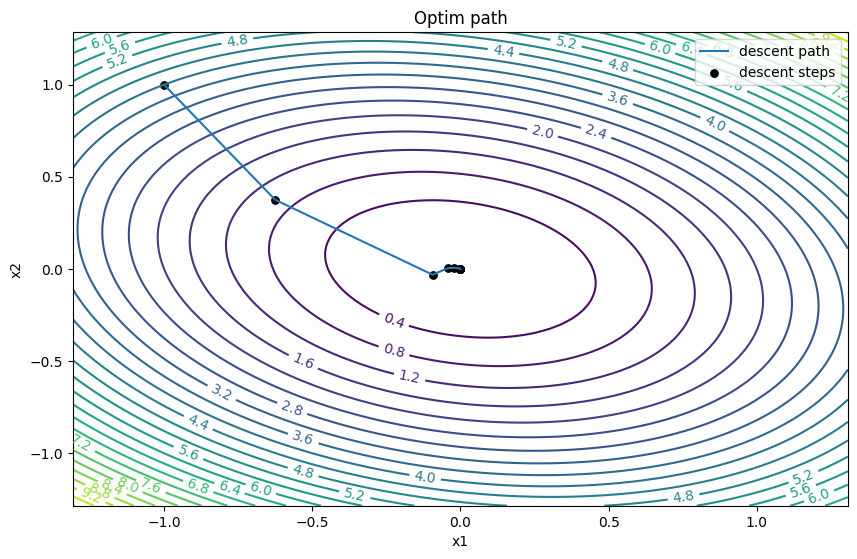

In [6]:
print(f'N_iter: {xs.shape[0] - 1}')
print(f'Solution xk: {xs[-1]}, function: {ys[-1]}')
dr = OptimVisualizer(armi.count_func, xs)
dr.draw_descent_path(xs)

## Task 2

In [7]:
x1, x2 = sp.symbols('x1 x2')
f = x1 ** 2 + sp.exp(x2 ** 2)
x0 = np.array([1, 1])

In [8]:
newt = NewtonMethod(x1, x2, f, x0)
newt.descend()

In [9]:
xs = np.array(newt.x_history)
ys = np.array(newt.f_history)

N_iter: 5
Solution xk: [0.0000000e+00 4.0828782e-11], function: 1.0


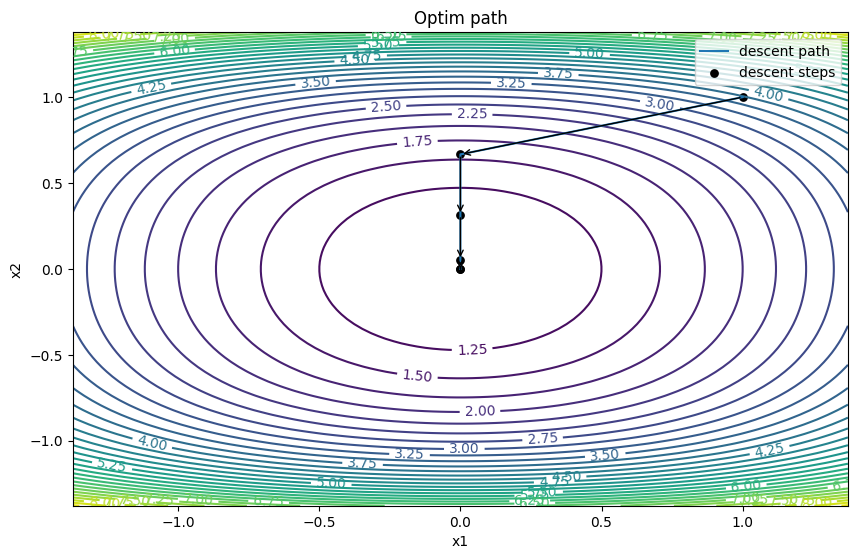

In [10]:
print(f'N_iter: {xs.shape[0] - 1}')
print(f'Solution xk: {xs[-1]}, function: {ys[-1]}')
dr = OptimVisualizer(newt.count_func, xs)
dr.draw_descent_path(xs, arr=True)

## Task 3

In [11]:
a = np.array([[1, 0], [0, 2]])
b = 0
x0 = np.array([1, 1])

In [12]:
cgrad = ConjugateGradientDescent(a, b, x0)
cgrad.descend()

In [13]:
xs = np.array(cgrad.x_history)
ys = np.array(cgrad.f_history)

N_iter: 2
Solution xk: [ 5.55111512e-17 -6.93889390e-17], function: 1.2711137632955757e-32


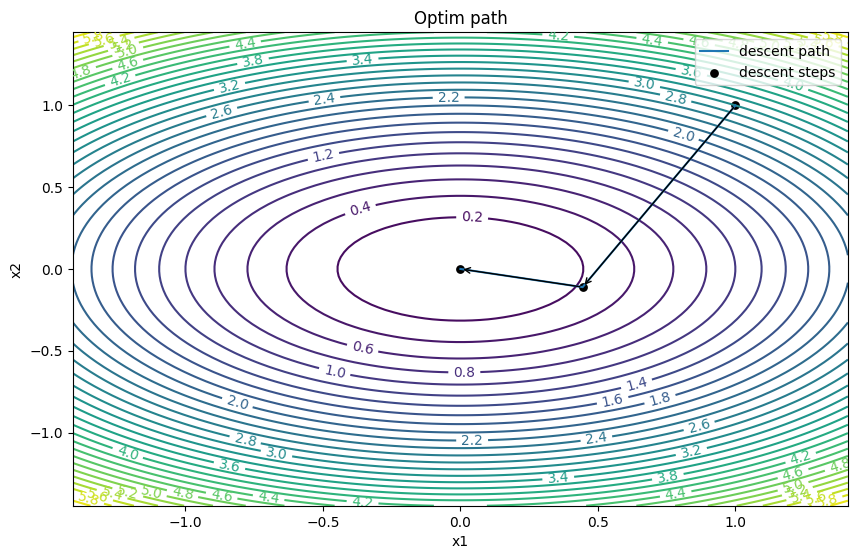

In [14]:
print(f'N_iter: {xs.shape[0] - 1}')
print(f'Solution xk: {xs[-1]}, function: {ys[-1]}')
dr = OptimVisualizer(cgrad.count_func, xs)
dr.draw_descent_path(xs, arr=True)

## Task 4

In [15]:
conditions = np.array(
    [
        [1, 0, 0, 1],
        [1, 0, 1, -1],
        [0, 1, 0, 1],
        [0, 1, 2, -1]
    ]
)
x1, x2 = sp.symbols('x1 x2')
f = x1 ** 2 - 4 * x1 + x2 ** 2 + 2 * x2
x0 = np.array([0, 0])

In [16]:
cgd = ConditionalGradientDescent(x1, x2, f, x0, conditions, crit=0.1)
cgd.descend()

In [17]:
xs = np.array(cgd.x_history)
ys = np.array(cgd.f_history)

In [18]:
def draw_condition(ax, points):
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    
    for el1, el2 in combinations(points, r=2):
        if (el1 == el2).any():
            ax.plot([el1[0], el2[0]], [el1[1], el2[1]], label='condition')
            
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.legend()

N_iter: 2
Solution xk: [1. 0.], function: -3.0


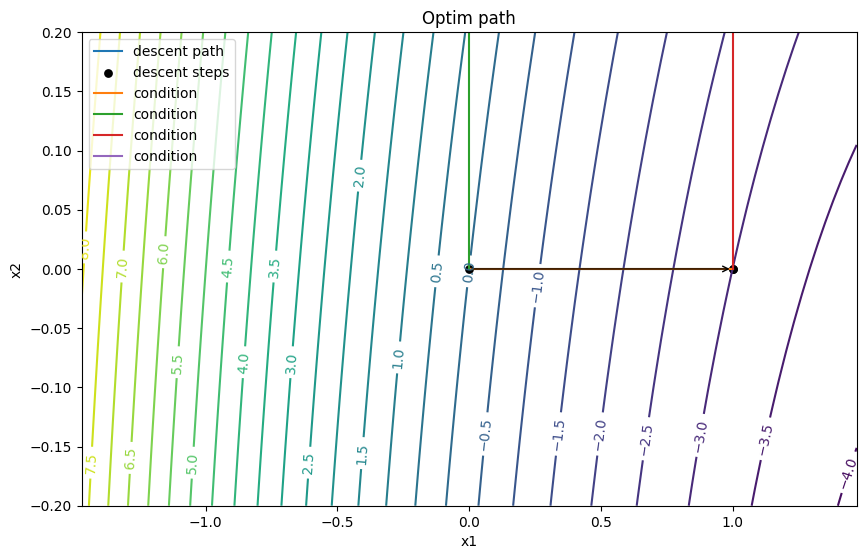

In [19]:
print(f'N_iter: {xs.shape[0] - 1}')
print(f'Solution xk: {xs[-1]}, function: {ys[-1]}')
dr = OptimVisualizer(cgd.count_func, xs, eps=0.2)
ax = dr.draw_descent_path(xs, arr=True, show=False)
draw_condition(ax, cgd._set.points)

## Task 5

In [25]:
x1, x2, k = sp.symbols('x1 x2 k')
ck = 2 ** k
f = 2 * (x1 ** 2) + (x2 - 1) ** 2
f_cond = 2 * x1 + x2

x0 = np.array([1, 1])
alpha = 1 / 32

In [26]:
qgd = QuadraticLossDescent(x1, x2, f, x0, f_cond, k, ck, alpha)
qgd.descend()

In [27]:
xs = np.array(qgd.x_history)
ys = np.array(qgd.f_history)

In [28]:
def draw_condition(ax):
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    
    sub_func = sp.lambdify((x1, ), -2 * x1)
    
    ys = [sub_func(x) for x in x_lim]
    ax.plot(x_lim, ys, label='condition')
    
    ax.set_ylim(y_lim)
    ax.legend()

N_iter: 328
Solution xk: [-0.34618246  0.67313319], function: 0.3465265028437985


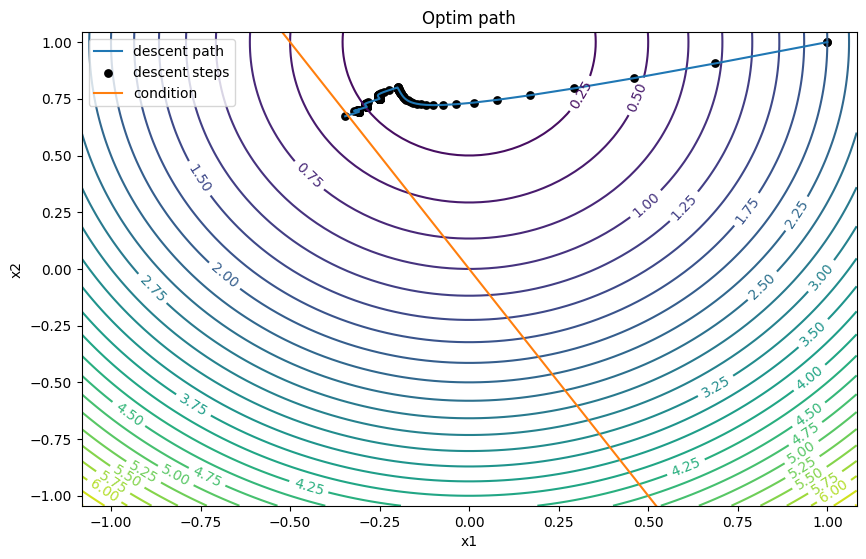

In [29]:
print(f'N_iter: {xs.shape[0] - 1}')
print(f'Solution xk: {xs[-1]}, function: {ys[-1]}')
dr = OptimVisualizer(qgd.count_func, xs)
ax = dr.draw_descent_path(xs, show=False)
draw_condition(ax)

## Task 6
Решение лежит в файле `Task 6.pdf`, ниже оно же в коде

In [30]:
c = np.array([-1, 3, 5, 1])
a_eq = np.array([
    [1, 4, 4, 1],
    [1, 7, 8, 2]
])
b_eq = np.array([5, 9])
x0 = np.array([1, 0, 1, 0])

In [31]:
def iter1(ob):
    global res
    res.append((ob.x, ob.fun))

In [32]:
res = []
opt = spi.optimize.linprog(c, A_eq=a_eq, b_eq=b_eq, method='simplex', 
                    callback=iter1, x0=x0)

/Users/v.i.zykova/.pyenv/versions/3.10.7/lib/python3.10/site-packages/scipy/optimize/_linprog.py:615: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/var/folders/d0/fv07hvxd1nb4x_xxdnrl4d2h0000gq/T/ipykernel_56581/3657757677.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = spi.optimize.linprog(c, A_eq=a_eq, b_eq=b_eq, method='simplex',


In [33]:
print(f'N_iter: {len(res)}')
print(f'Solution xk: {res[-1][0]}, function: {res[-1][1]}')

N_iter: 5
Solution xk: [1. 0. 0. 4.], function: 3.0
